# Breast Cancer Coimbra Data Set

## 1. Load dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('dataR2.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB
None


In [ ]:
# Visualization: Load dataset
features = df.iloc[:, :-1]
classification = df.iloc[:, -1]

print(">>> example features:")
print(features.head())

print(">>> example classification: ")
print(classification.head(), "\n")

print(">>> classification has unique (labels, counts): ")
print(classification.value_counts(), "\n")

print(">>> features has shape: ")
print(features.shape)

>>> example features:
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  
0  417.114  
1  468.786  
2  554.697  
3  928.220  
4  773.920  
>>> example classification: 
0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int64 

>>> classification has unique (labels, counts): 
Classification
1    64
0    52
Name: count, dtype: int64 

>>> features has shape: 
(116, 9)


## 2. Exploratory data analysis
- Plot scatter matrix with class=0 being red and class=1 being green.
- Select the first 40 rows of Class 0 and the first 48 rows of Class 1 as the training set (`training_data`, `training_class`) and the rest of the data as the test set (`test_data`, `test_class`).

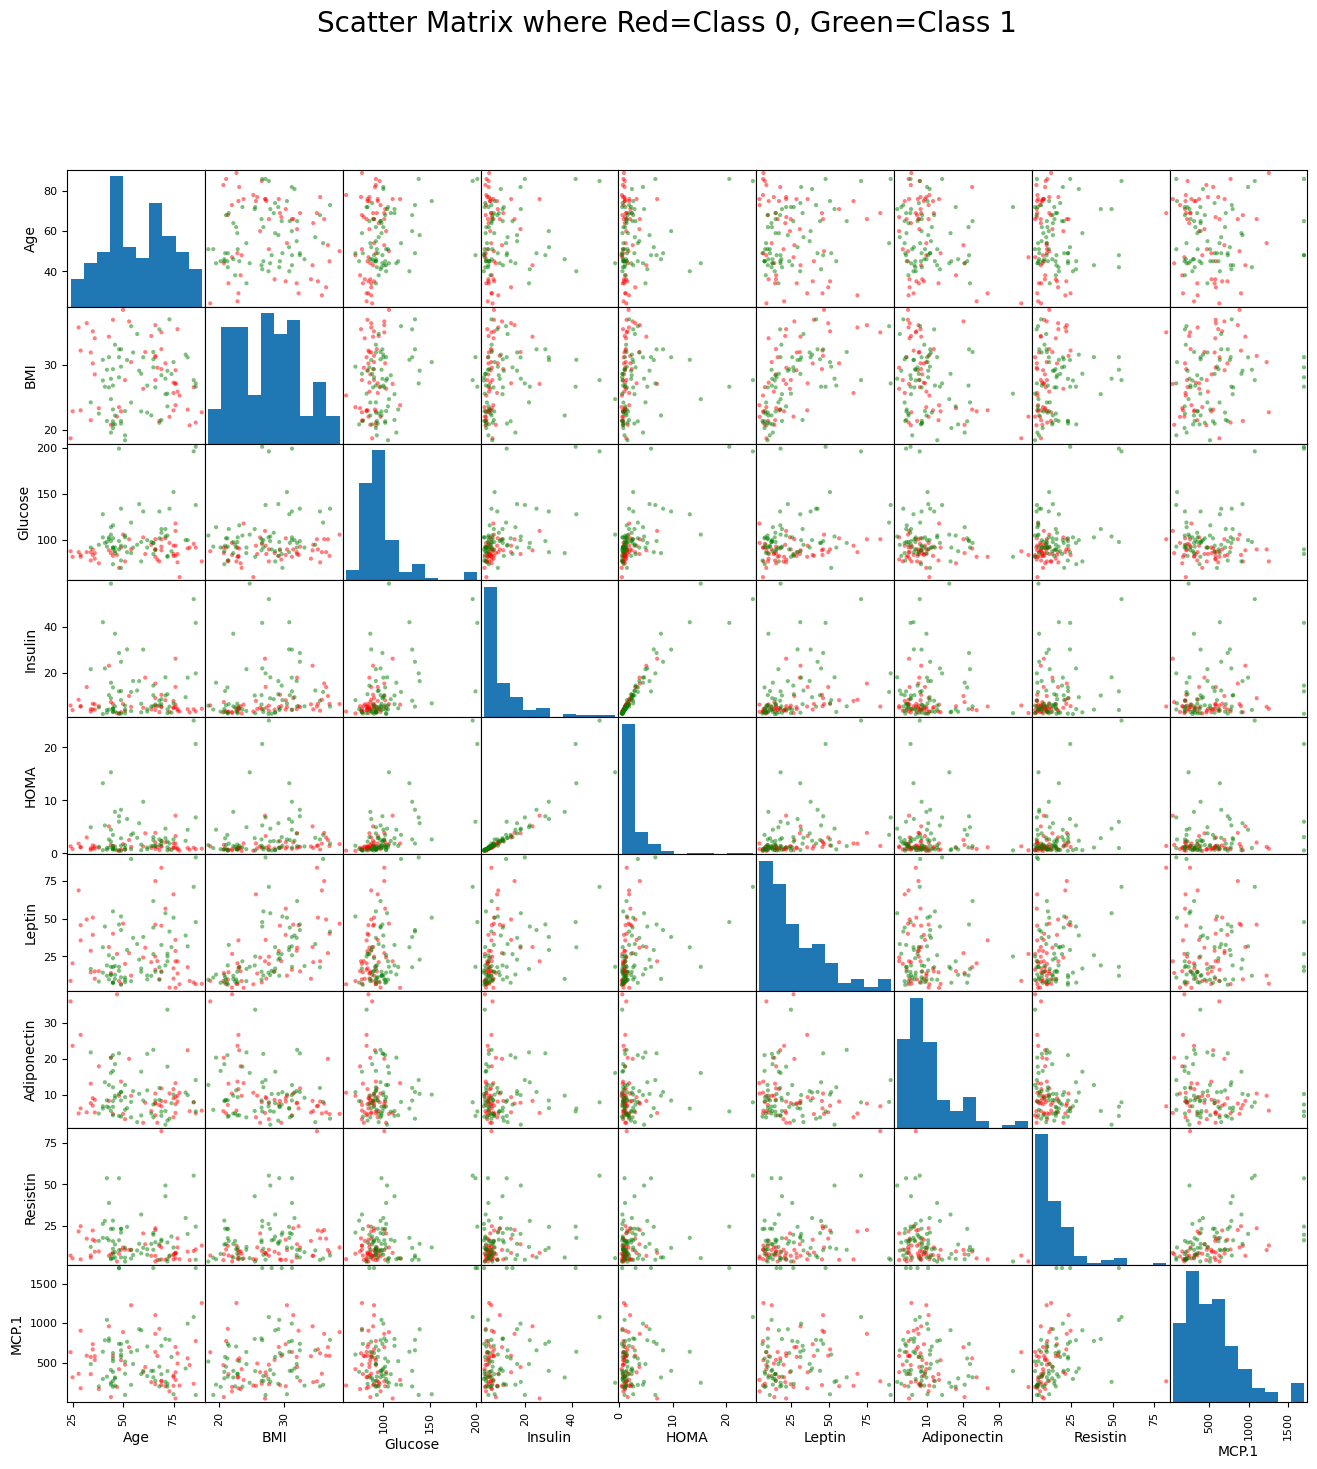

In [ ]:
# ===== Make a colored scatter matrix ===== #
colors = ['red' if c == 0 else 'green' for c in classification]
scatterMatrix = pd.plotting.scatter_matrix(
    features,
    figsize = (16,16),
    color = colors
)
plt.suptitle('Scatter Matrix where Red=Class 0, Green=Class 1', fontsize = 20)
plt.show()
# ===== End of Make a colored scatter matrix ===== #

# ===== Divide into training and test set ===== #
class0 = df[classification == 0]
class1 = df[classification == 1]

#First 40 rows from class X and first 48 from class y
X_train = class0.iloc[:40]
y_train = class1.iloc[:48]
X_test = class0.iloc[40:]
y_test = class1.iloc[48:]

#Training and test data
training_data = pd.concat([X_train.iloc[:, :-1], y_train.iloc[:, :-1]], axis=0)
training_class = pd.concat([X_train.iloc[:, -1], y_train.iloc[:, -1]], axis=0)
test_data = pd.concat([X_test.iloc[:, :-1], y_test.iloc[:, :-1]], axis=0)
test_class = pd.concat([X_test.iloc[:, -1], y_test.iloc[:, -1]], axis=0)
# ===== End of Divide into training and test set ===== #

In [ ]:
print(f"Training set size: {len(training_data)}, Test set size: {len(test_data)}")
print(f">>> Passed P1(b) Tests.")

Training set size: 88, Test set size: 28
>>> Passed P1(b) Tests.


## 3. Classification using KNN on Breast Cancer Coimbra Data Set
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `euclidean`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k.

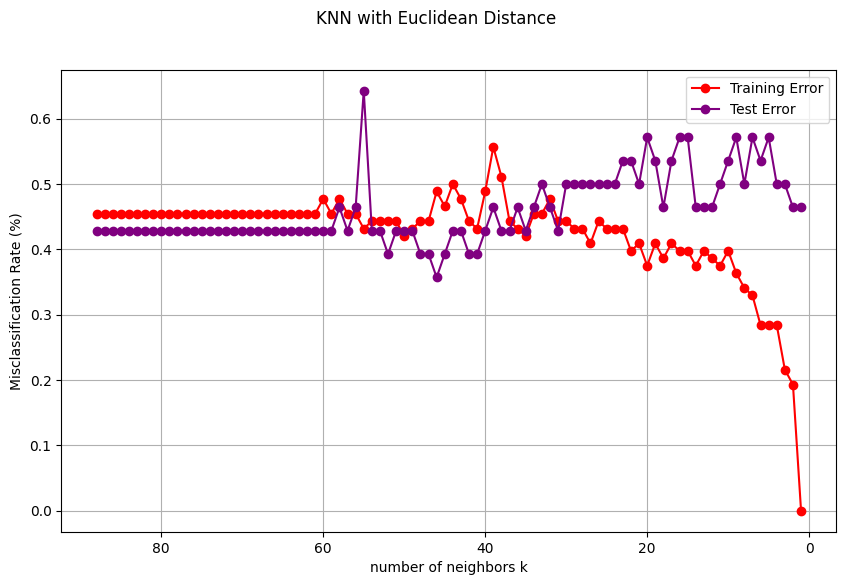

In [ ]:
# ===== Classify training/test data ===== #
k_values = list(range(88, 0, -1))
#Store train and test errors
train_errors = []
test_errors = []

#Convert training & test data to arrays
X_train = training_data.values
y_train = training_class.values
X_test = test_data.values
y_test = test_class.values

#Loop over all k train model and compute misclassification rate
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    train_errors.append(1-knn.score(X_train, y_train))
    test_errors.append(1-knn.score(X_test, y_test))
# ===== End of Classify training/test data ===== #

# ===== Plot misclassification rate ===== #
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, color='red', marker='o', label='Training Error')
plt.plot(k_values, test_errors, color='purple', marker='o', label='Test Error')
plt.xlabel('number of neighbors k')
plt.ylabel('Misclassification Rate (%)')
plt.suptitle('KNN with Euclidean Distance')
plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()
# ===== End of Plot misclassification rate ===== #

In [ ]:
# ===== Which k^* is the most suitable k ===== #
best_k_idx = np.argmin(test_errors)
best_k = list(k_values)[best_k_idx]
print(f">>> Most suitable k: {best_k}")
# ===== End of Which k^* is the most suitable k ===== #

>>> Most suitable k: 46


## 4. Replace the Euclidean metric with the Minkowski distance
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [ ]:
# ===== Classify training/test data ===== #
k_values = list(range(88, 0, -1))
p_values = range(1, 6)
#Store test errors
test_errors_grid = np.zeros((len(k_values), len(p_values)))

#Convert training & test data to arrays
X_train = training_data.values
y_train = training_class.values
X_test = test_data.values
y_test = test_class.values

#Loop over all k & p to train model and compute misclassification rate
for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='minkowski', p=p)
        knn.fit(X_train, y_train)
        test_errors_grid[i, j] = 1-knn.score(X_test, y_test)
# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #
min_idx = np.unravel_index(np.argmin(test_errors_grid), test_errors_grid.shape)
optimal_k = list(k_values)[min_idx[0]]
optimal_p = list(p_values)[min_idx[1]]
print(f">>> optimal k is {optimal_k}, optimal p is {optimal_p}")
# ===== End of Find the optimal (k, p) ===== #

>>> optimal k is 52, optimal p is 1


# 5. Set 'weights' to 'distance'
- Train kNN module with training data. Set `weights` to `distance`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [ ]:
# ===== Classify training/test data ===== #
k_values = list(range(88, 0, -1))
p_values = range(1, 6)
#Store test errors
test_errors_grid = np.zeros((len(k_values), len(p_values)))

#Convert training & test data to arrays
X_train = training_data.values
y_train = training_class.values
X_test  = test_data.values
y_test  = test_class.values

#Loop over all k & p to train model and compute misclassification rate
for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=p)
        knn.fit(X_train, y_train)
        test_errors_grid[i, j] = 1-knn.score(X_test, y_test)
# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #
min_idx = np.unravel_index(np.argmin(test_errors_grid), test_errors_grid.shape)
optimal_k = list(k_values)[min_idx[0]]
optimal_p = list(p_values)[min_idx[1]]
print(f">>> optimal k is {optimal_k}, optimal p is {optimal_p}")
# ===== End of Find the optimal (k, p) ===== #

>>> optimal k is 12, optimal p is 1
